In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


# Functions

In [2]:
def plot_age_group_distribution(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [1, 4, 7, 10, 13, 16]  # adding one more bin for 16-18
    age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')
    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df

# number of images in each age group colored by mated

def plot_age_group_distribution_mated(df, title, figsize=(11, 7)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [1, 4, 7, 10, 13, 16]  # adding one more bin for 16-18
    age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}


    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    # ax = sns.countplot(data=df, x='Age Group', hue='Mated', palette='coolwarm')
    ax = sns.countplot(data=df, x='Age Group', hue='Enrolled', palette=enrolled_palette, alpha = 0.6)

    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def number_of_enrolled_ids_agebin(df, title, figsize=(11, 7)):
    """
    Plots the distribution of unique image IDs within the provided DataFrame,
    grouped by age bins and enrollment status, with specific colors for enrolled and non-enrolled.

    Parameters:
    - df: Pandas DataFrame containing 'Age' and 'im_id' columns.
    - title: str
        The title for the plot.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [1, 4, 7, 10, 13, 16]
    age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Group by 'Age Group' and 'Enrolled', then count unique 'im_id'
    age_enrolled_counts = df.groupby(['Age Group', 'Enrolled'])['identity_name'].nunique().reset_index(name='Count')

    # Define the colors for the plot
    # enrolled_palette = {'Enrolled': 'cornflowerblue', 'Non-enrolled': 'orange'}
    # Define the colors for the plot
    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}




    # Create the bar plot for the age groups with count of unique image IDs
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=age_enrolled_counts, x='Age Group', y='Count', hue='Enrolled', palette=enrolled_palette, alpha = 0.6)

    plt.title(f"Age Group Distribution of Enrollled IDs - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# Enrolled image IDs")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Enrolled", "Non-Enrolled"], title='Enrolled Status')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_ethnicity_distribution(df, title):
    # Load data
    df = df
    sns.set_style("whitegrid")
    # Plotting the distribution of ethnicity
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x='ethnicity', order=df['ethnicity'].value_counts().index,alpha=0.6)
    plt.title(f'Ethnicity Distribution - {title}')
    plt.xlabel('Ethnicity')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')
    plt.show()



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_ethnicity_distribution(df1, df2, title1, title2):
    # Setting the style
    sns.set_style("whitegrid")

    # Create a list of all unique ethnicities from both dataframes
    all_ethnicities = pd.concat([df1['ethnicity'], df2['ethnicity']]).unique()
    all_ethnicities.sort()

    # Preparing the figure
    plt.figure(figsize=(12, 8))

    # Calculate the width of the bars
    total_width = 0.8
    width = total_width / 2
    x = np.arange(len(all_ethnicities))

    # Plotting the first dataframe
    ax1 = sns.barplot(data=df1, x='ethnicity', y=df1.groupby('ethnicity').size(),
                      order=all_ethnicities, color='lightgreen', label=title1, alpha=0.6,
                      estimator=len, errorbar=None, zorder=2, width=width)
    ax1.set_xticks(x - width/2)

    # Plotting the second dataframe
    ax2 = sns.barplot(data=df2, x='ethnicity', y=df2.groupby('ethnicity').size(),
                      order=all_ethnicities, color='skyblue', label=title2, alpha=0.6,
                      estimator=len, errorbar=None, zorder=3, width=width)
    ax2.set_xticks(x + width/2)

    # Adding title and labels
    plt.title('Combined Ethnicity Distribution')
    plt.xlabel('Ethnicity')
    plt.ylabel('Image count')
    plt.xticks(x, all_ethnicities, rotation=45)

    # Adding annotations for count on each bar
    for p in ax1.patches + ax2.patches:
        ax1.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Adding a legend to distinguish between the two dataframes
    plt.legend(title="Dataset")

    plt.show()

# Children balanced

In [3]:
# # Mated and non-mated ids ###OBS
# c_df = pd.read_csv('../data/child_balanced.csv')
# c_mates = c_df.groupby("im_id").agg({'im_id': ['count']})
# c_mated_ids = c_mates[c_mates[('im_id', 'count')] > 1].index


# c_df['Enrolled'] = np.where(c_df['im_id'].isin(c_mated_ids), 'Enrolled', 'Non-enrolled')

In [4]:
# c_mates = c_df.groupby("im_id").agg({'im_id': ['count']})
# c_mated_ids = c_mates[c_mates[('im_id', 'count')] > 1].index

In [5]:
# plot_age_group_distribution(c_df, 'Children balanced')

In [6]:
import os
os.getcwd()

'/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data'

In [7]:
import sys
sys.path.insert(0, '../utils')

In [8]:
children_all

NameError: name 'children_all' is not defined

In [9]:

from Data_proc_utils.Data_proc_funcs import *

random_states = [42]
# children_all = pd.read_csv('../data/image_info_csvs/YLFW_full_info_including_adults.csv')
children_all = pd.read_csv('../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_balanced_df_1 = balance_child_data(children_all, print_stats=True, random_state=random_states[0])


minority age group from childrens data:  13-15 
number of images:  642 

racial distribution: ethnicity
Indian       176
African      169
Caucasian    158
Asian        139
Name: image_name, dtype: int64 

All new groups should have same distribution

Other age group stats: 
0-3
 Series([], Name: image_name, dtype: int64)

16-18 Series([], Name: image_name, dtype: int64)
Balanced data?: 13-15    642
1-3      642
4-6      642
7-9      642
10-12    642
Name: children_agegroup, dtype: int64


In [10]:
########### Adults

children_all = pd.read_csv('../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')


In [11]:

children_balanced_df_1 = balance_child_data(children_all, print_stats=True, random_state=random_states[0])


minority age group from childrens data:  13-15 
number of images:  642 

racial distribution: ethnicity
Indian       176
African      169
Caucasian    158
Asian        139
Name: image_name, dtype: int64 

All new groups should have same distribution

Other age group stats: 
0-3
 Series([], Name: image_name, dtype: int64)

16-18 Series([], Name: image_name, dtype: int64)
Balanced data?: 13-15    642
1-3      642
4-6      642
7-9      642
10-12    642
Name: children_agegroup, dtype: int64


In [13]:

adults_all = pd.read_csv('../data/image_info_csvs/RFW_full_info_excluding_children.csv')
adults_balanced_df_1 = balance_adults_data_enrolled(children_balanced_df_1, adults_all, print_stats=True, random_state=random_states[0])


Balanced data between adults and children?: 

adults:  ethnicity
African      494
Caucasian    494
Indian       444
Asian        411
Name: identity_name, dtype: int64 
number of enrolled, and non-enrolled ids (a):  802 1041 

children:  ethnicity
African      494
Caucasian    494
Indian       444
Asian        411
Name: identity_name, dtype: int64 
number of enrolled, and non-enrolled ids (c):  802 1041
Duplicates? 0
is child ids same as adults ids number non-enrolled? 228 228


In [14]:
print(len(adults_balanced_df_1))
print(len(children_balanced_df_1))

3832
3210


In [15]:
adults_balanced_df_1
# children_balanced_df_1

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup
0,African_m.01257s/m.01257s_0001.jpg,m.01257s_0001,m.01257s,enrolled,African,30,m.01257s,63,83,80,97,NaN
1,African_m.01257s/m.01257s_0002.jpg,m.01257s_0002,m.01257s,enrolled,African,36,m.01257s,28,61,98,98,NaN
2,African_m.01257s/m.01257s_0003.jpg,m.01257s_0003,m.01257s,enrolled,African,30,m.01257s,8,34,100,99,NaN
3,African_m.013w7j/m.013w7j_0001.jpg,m.013w7j_0001,m.013w7j,enrolled,African,28,m.013w7j,42,99,100,100,NaN
4,African_m.013w7j/m.013w7j_0002.jpg,m.013w7j_0002,m.013w7j,enrolled,African,25,m.013w7j,18,63,96,98,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3827,Indian_m.026_007/m.026_007_0001.jpg,m.026_007_0001,m.026_007,enrolled,Indian,56,m.026_007,82,94,98,100,NaN
3828,Indian_m.026_041/m.026_041_0001.jpg,m.026_041_0001,m.026_041,enrolled,Indian,59,m.026_041,83,92,94,100,NaN
3829,Indian_m.026_5_4/m.026_5_4_0001.jpg,m.026_5_4_0001,m.026_5_4,enrolled,Indian,30,m.026_5_4,9,100,100,100,NaN
3830,Indian_m.026_9c2/m.026_9c2_0001.jpg,m.026_9c2_0001,m.026_9c2,enrolled,Indian,28,m.026_9c2,92,92,100,100,NaN


In [16]:
# Count how many times each identity_name occurs
counts = children_all['identity_name'].value_counts()

# Filter to get the identity names that occur exactly once
single_occurrence = counts[counts > 1].index
len(single_occurrence)
# Filter the original DataFrame to include only rows with these identity names
# result_df = adults_balanced_df_1[adults_balanced_df_1['identity_name'].isin(single_occurrence)]


2098

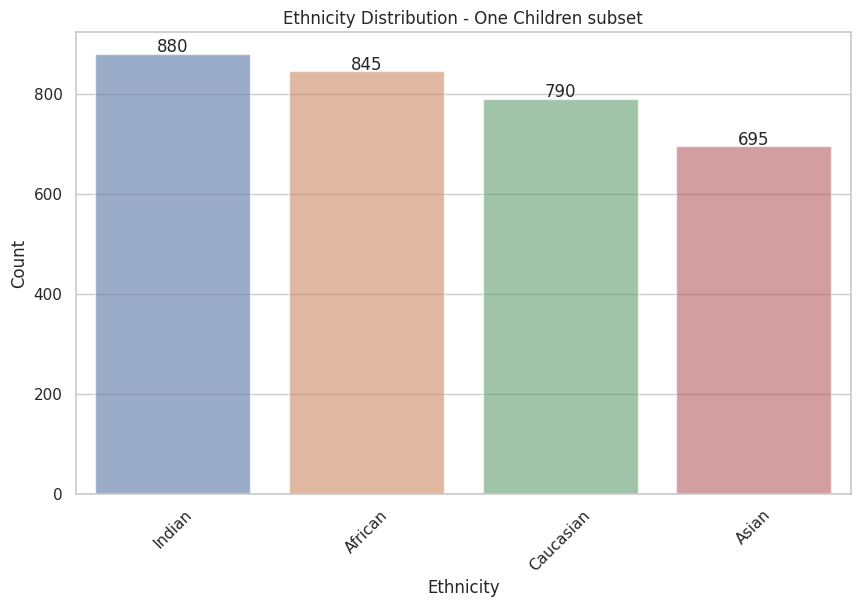

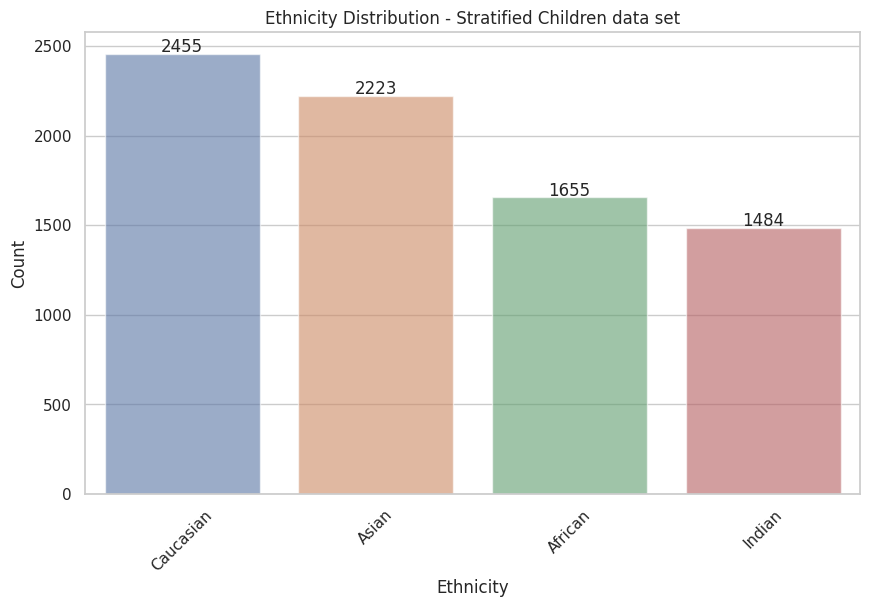

In [17]:
# Example usage
plot_ethnicity_distribution(children_balanced_df_1, 'One Children subset')
plot_ethnicity_distribution(children_all, 'Stratified Children data set')


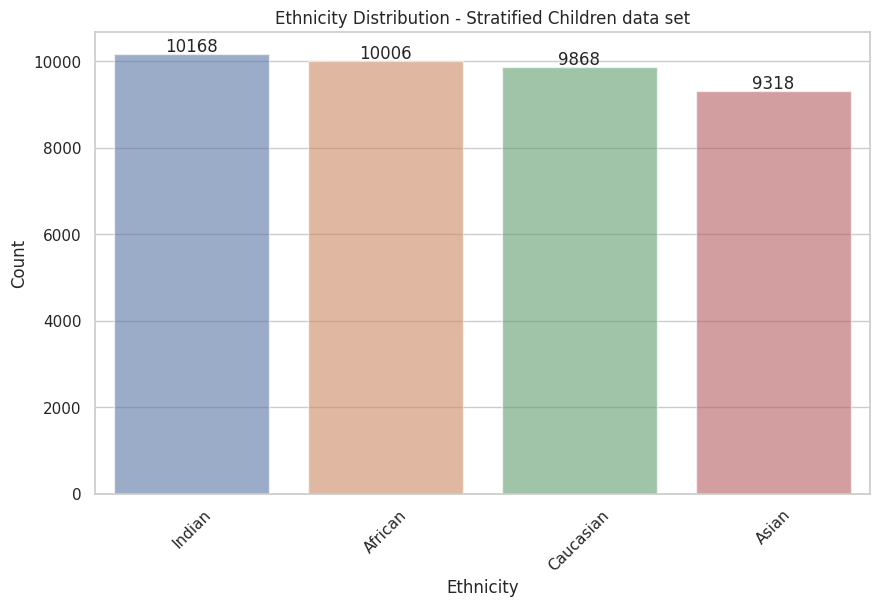

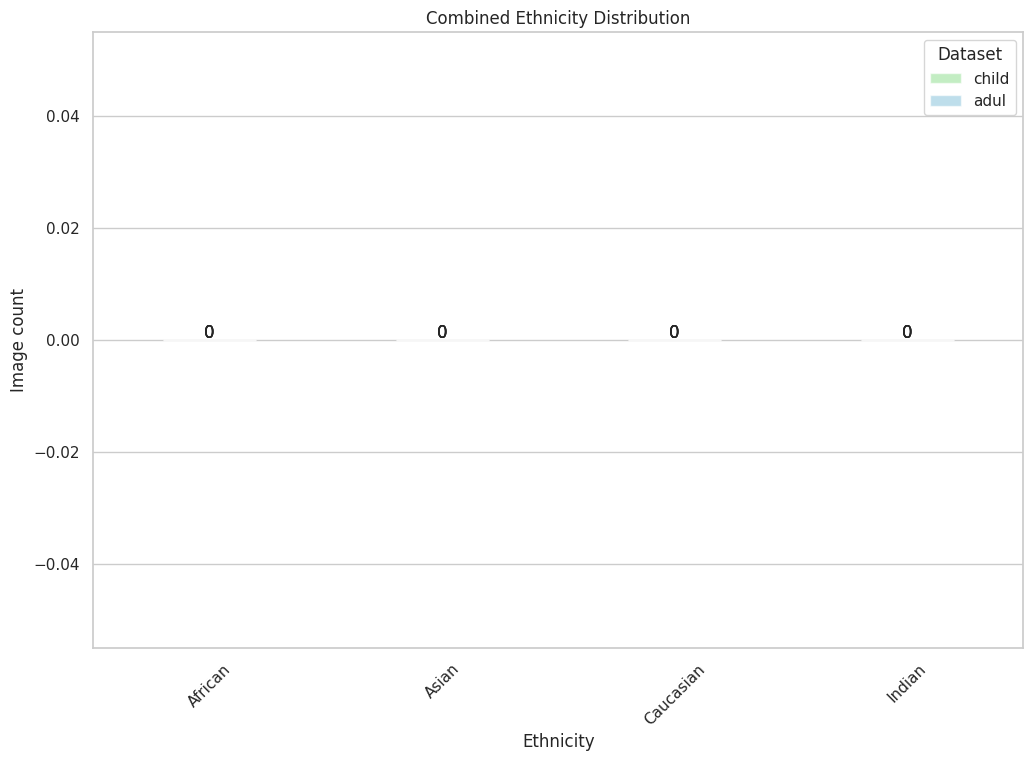

In [18]:
plot_ethnicity_distribution(adults_all, 'Stratified Children data set')
plot_combined_ethnicity_distribution(children_balanced_df_1, adults_balanced_df_1, 'child', 'adul')

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_ethnicity_distribution(df1, df2, title1, title2, title_all):
    sns.set_style("whitegrid")

    # Combining and sorting ethnicities
    all_ethnicities = pd.concat([df1['ethnicity'], df2['ethnicity']]).unique()
    all_ethnicities.sort()

    # Prepare data
    df1_counts = df1['ethnicity'].value_counts().reindex(all_ethnicities, fill_value=0).reset_index()
    df1_counts.columns = ['ethnicity', 'count']
    df2_counts = df2['ethnicity'].value_counts().reindex(all_ethnicities, fill_value=0).reset_index()
    df2_counts.columns = ['ethnicity', 'count']

    # Plot setup
    plt.figure(figsize=(10, 6))
    width = 0.35  # Width of the bars

    # Plotting
    x = np.arange(len(all_ethnicities))  # the label locations
    plt.bar(x - width/2, df1_counts['count'], width, label=title1, color='lightgreen', alpha=0.6)
    plt.bar(x + width/2, df2_counts['count'], width, label=title2, color='skyblue', alpha=0.6)

    # Labels, title and custom x-axis tick labels
    plt.ylabel('Image count')
    plt.title(f'Combined Ethnicity Distribution - {title_all}')
    plt.xticks(x, all_ethnicities, rotation=45)
    plt.xlabel('Ethnicity')

    # Adding a legend
    plt.legend(title="Dataset")

    plt.show()

# Example usage:
# plot_combined_ethnicity_distribution(df1, df2, 'Dataset 1', 'Dataset 2')


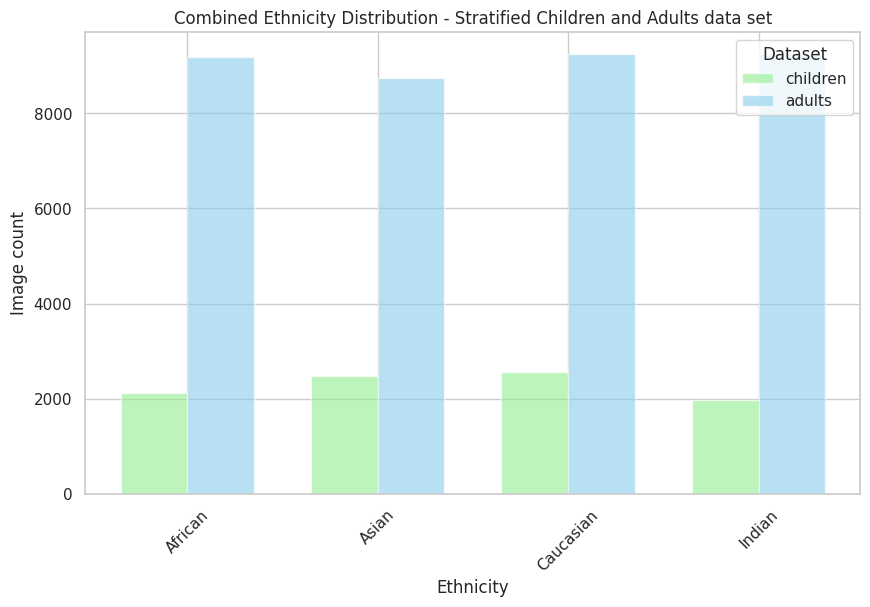

In [210]:
plot_combined_ethnicity_distribution(children_all, adults_all, 'children', 'adults', 'Stratified Children and Adults data set')

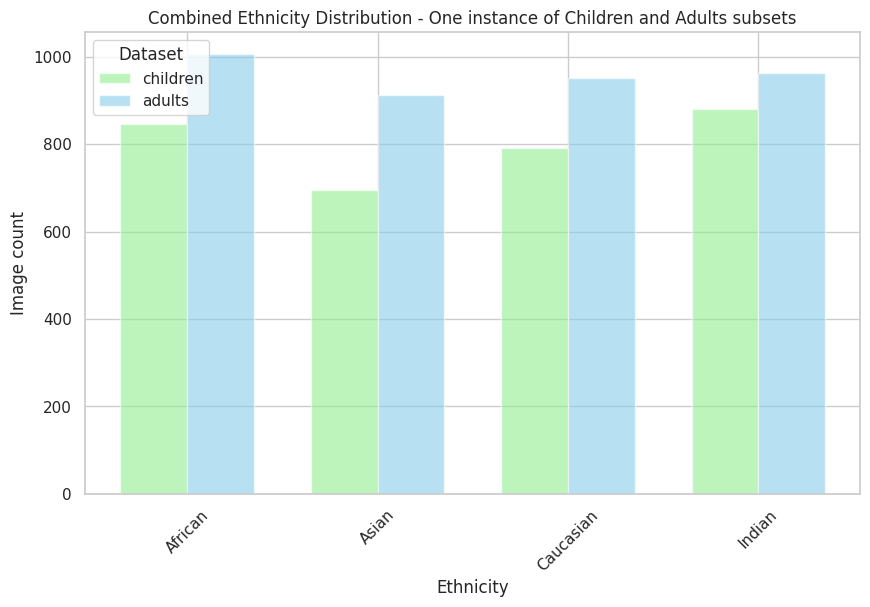

In [20]:
plot_combined_ethnicity_distribution(children_balanced_df_1, adults_balanced_df_1, 'children', 'adults', 'One instance of Children and Adults subsets')

In [21]:
# Mated and non-mated ids ###OBS
c_df = children_balanced_df_1
c_mates = c_df.groupby("identity_name").agg({'identity_name': ['count']})
c_mated_ids = c_mates[c_mates[('identity_name', 'count')] > 1].index


children_balanced_df_1['Enrolled'] = np.where(children_balanced_df_1['identity_name'].isin(c_mated_ids), 'Enrolled', 'Non-enrolled')


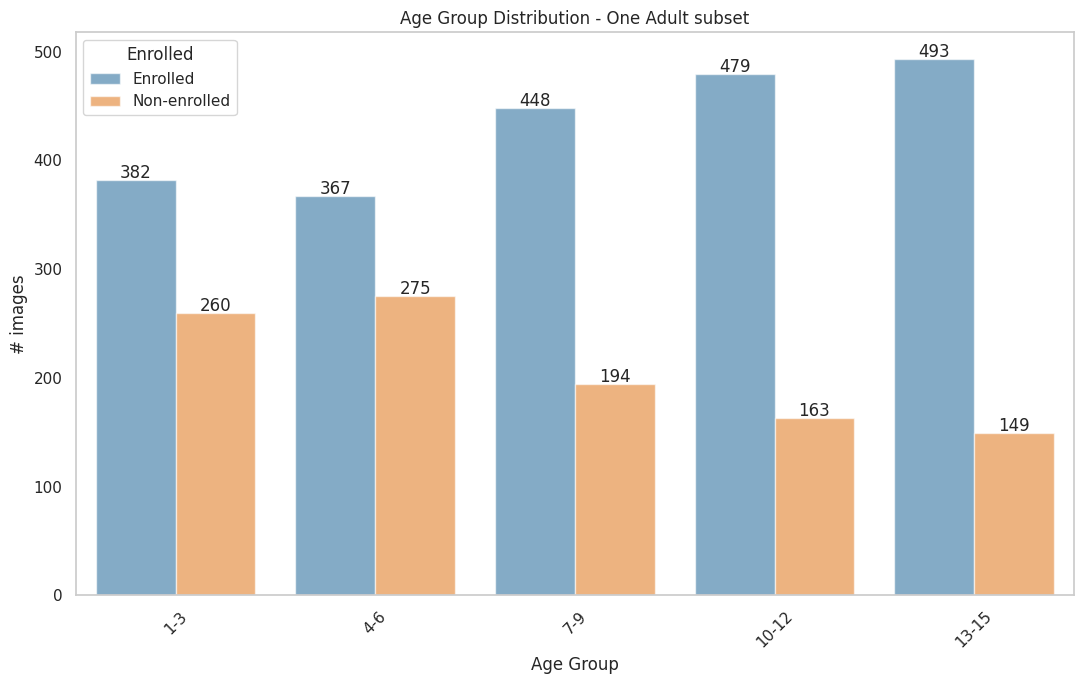

,Unnamed: 0,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Enrolled,Age Group
0,10,African_109/African_109_3.png,African_109_3,enrolled,African_109,African,13,African_109,10.0,100.0,78.0,100.0,13-15,Enrolled,13-15
1,16,African_113/African_113_0.png,African_113_0,enrolled,African_113,African,15,African_113,11.0,98.0,68.0,100.0,13-15,Enrolled,13-15
2,34,African_119/African_119_14.png,African_119_14,enrolled,African_119,African,15,African_119,15.0,100.0,96.0,100.0,13-15,Enrolled,13-15
3,48,African_121/African_121_2.png,African_121_2,enrolled,African_121,African,13,African_121,8.0,84.0,100.0,100.0,13-15,Enrolled,13-15
4,55,African_127/African_127_6.png,African_127_6,enrolled,African_127,African,15,African_127,21.0,100.0,80.0,100.0,13-15,Enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,6621,Indian_522/Indian_522_1.png,Indian_522_1,enrolled,Indian_522,Indian,10,Indian_522,31.0,93.0,100.0,100.0,10-12,Non-enrolled,10-12
3206,6996,Indian_693/Indian_693_7.png,Indian_693_7,enrolled,Indian_693,Indian,11,Indian_693,23.0,89.0,92.0,100.0,10-12,Enrolled,10-12
3207,6792,Indian_599/Indian_599_4.png,Indian_599_4,enrolled,Indian_599,Indian,10,Indian_599,68.0,100.0,99.0,100.0,10-12,Enrolled,10-12
3208,7017,Indian_706/Indian_706_2.png,Indian_706_2,enrolled,Indian_706,Indian,10,Indian_706,78.0,99.0,100.0,100.0,10-12,Enrolled,10-12


In [22]:
plot_age_group_distribution_mated(children_balanced_df_1, 'One Adult subset')


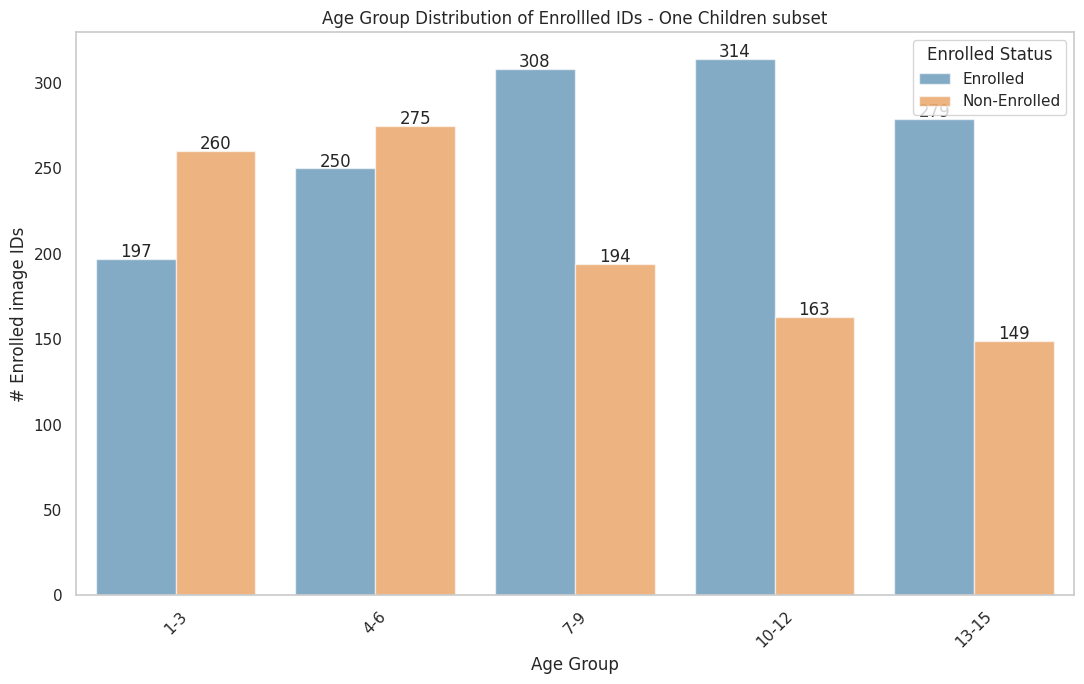

,Unnamed: 0,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Enrolled,Age Group
0,10,African_109/African_109_3.png,African_109_3,enrolled,African_109,African,13,African_109,10.0,100.0,78.0,100.0,13-15,Enrolled,13-15
1,16,African_113/African_113_0.png,African_113_0,enrolled,African_113,African,15,African_113,11.0,98.0,68.0,100.0,13-15,Enrolled,13-15
2,34,African_119/African_119_14.png,African_119_14,enrolled,African_119,African,15,African_119,15.0,100.0,96.0,100.0,13-15,Enrolled,13-15
3,48,African_121/African_121_2.png,African_121_2,enrolled,African_121,African,13,African_121,8.0,84.0,100.0,100.0,13-15,Enrolled,13-15
4,55,African_127/African_127_6.png,African_127_6,enrolled,African_127,African,15,African_127,21.0,100.0,80.0,100.0,13-15,Enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,6621,Indian_522/Indian_522_1.png,Indian_522_1,enrolled,Indian_522,Indian,10,Indian_522,31.0,93.0,100.0,100.0,10-12,Non-enrolled,10-12
3206,6996,Indian_693/Indian_693_7.png,Indian_693_7,enrolled,Indian_693,Indian,11,Indian_693,23.0,89.0,92.0,100.0,10-12,Enrolled,10-12
3207,6792,Indian_599/Indian_599_4.png,Indian_599_4,enrolled,Indian_599,Indian,10,Indian_599,68.0,100.0,99.0,100.0,10-12,Enrolled,10-12
3208,7017,Indian_706/Indian_706_2.png,Indian_706_2,enrolled,Indian_706,Indian,10,Indian_706,78.0,99.0,100.0,100.0,10-12,Enrolled,10-12


In [23]:
number_of_enrolled_ids_agebin(children_balanced_df_1, 'One Children subset')

# Canonical children data

In [29]:
canonical_df = pd.read_csv('../data/image_info_csvs/final_filtered_canonical_df_BIBLE.csv', sep=',')

In [30]:
canonical_df.head()

,Unnamed: 0,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup
0,0,African_0/African_0_0.png,African_0_0,enrolled,African_0,African,7,African_0,34.0,100.0,93.0,100.0,7-9
1,1,African_1/African_1_11.png,African_1_11,enrolled,African_1,African,5,African_1,65.0,100.0,99.0,100.0,4-6
2,3,African_10/African_10_1.png,African_10_1,enrolled,African_10,African,5,African_10,50.0,100.0,97.0,100.0,4-6
3,4,African_10/African_10_3.png,African_10_3,enrolled,African_10,African,6,African_10,25.0,90.0,100.0,100.0,4-6
4,5,African_10/African_10_4.png,African_10_4,enrolled,African_10,African,6,African_10,71.0,100.0,100.0,100.0,4-6


In [38]:
len(children_balanced_df_1)

3210

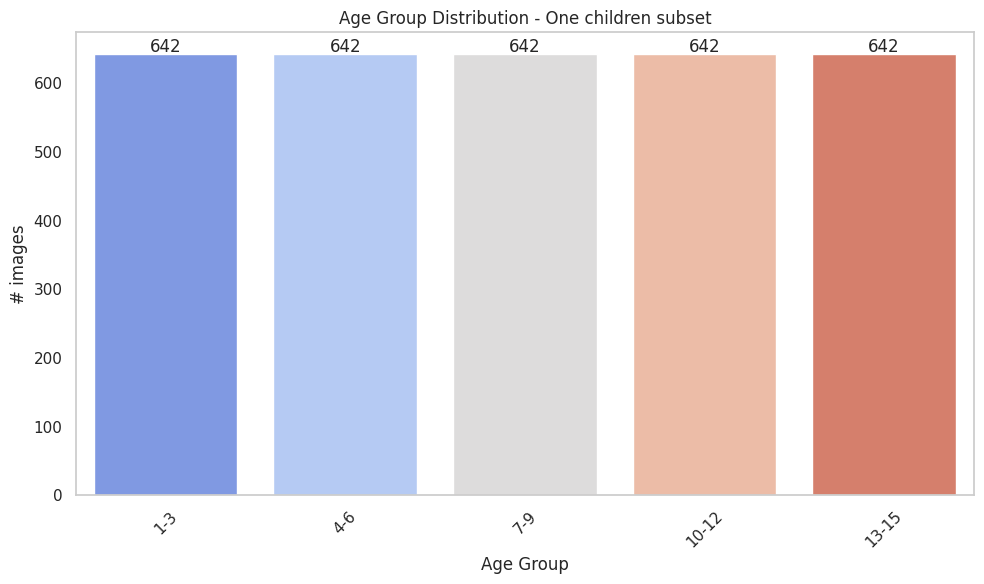

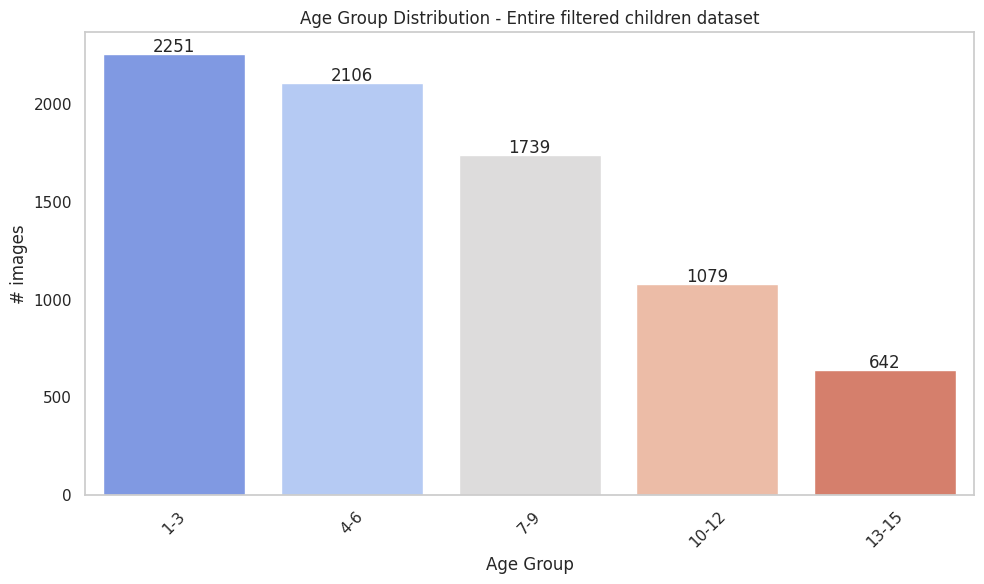

,Unnamed: 0,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Age Group
0,0,African_0/African_0_0.png,African_0_0,enrolled,African_0,African,7,African_0,34.0,100.0,93.0,100.0,7-9,7-9
1,1,African_1/African_1_11.png,African_1_11,enrolled,African_1,African,5,African_1,65.0,100.0,99.0,100.0,4-6,4-6
2,2,African_1/African_1_4.png,African_1_4,enrolled,African_1,African,2,African_1,23.0,95.0,99.0,100.0,1-3,1-3
3,3,African_10/African_10_1.png,African_10_1,enrolled,African_10,African,5,African_10,50.0,100.0,97.0,100.0,4-6,4-6
4,4,African_10/African_10_3.png,African_10_3,enrolled,African_10,African,6,African_10,25.0,90.0,100.0,100.0,4-6,4-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,7812,Indian_m.0h9448x/m.0h9448x_0002.jpg,m.0h9448x_0002,enrolled,m.0h9448x,Indian,14,m.0h9448x,86.0,100.0,100.0,100.0,13-15,13-15
7813,7813,Indian_m.0hncksb/m.0hncksb_0003.jpg,m.0hncksb_0003,enrolled,m.0hncksb,Indian,11,m.0hncksb,20.0,96.0,94.0,100.0,10-12,10-12
7814,7814,Indian_m.0j63px2/m.0j63px2_0003.jpg,m.0j63px2_0003,enrolled,m.0j63px2,Indian,12,m.0j63px2,88.0,99.0,98.0,100.0,10-12,10-12
7815,7815,Indian_m.0j63px2/m.0j63px2_0004.jpg,m.0j63px2_0004,enrolled,m.0j63px2,Indian,15,m.0j63px2,24.0,64.0,98.0,99.0,13-15,13-15


In [37]:
plot_age_group_distribution(children_balanced_df_1, 'One children subset')
plot_age_group_distribution(children_all, 'Entire filtered children dataset')


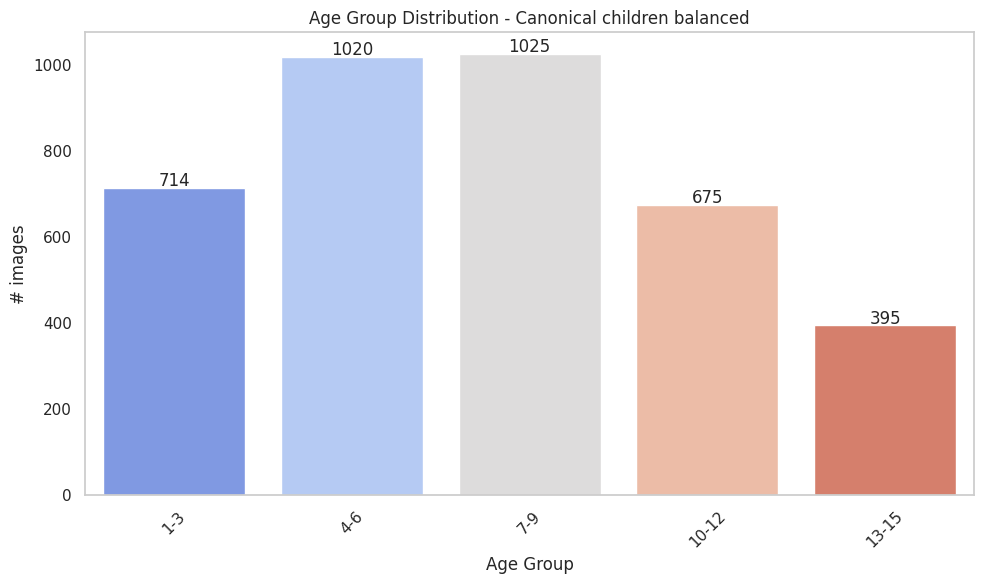

ValueError: Could not interpret input 'Enrolled'

<Figure size 1100x700 with 0 Axes>

In [32]:
plot_age_group_distribution(canonical_df, 'Canonical children balanced')
plot_age_group_distribution_mated(canonical_df, 'Canonical children balanced')
number_of_enrolled_ids_agebin(canonical_df,'Canonical children balanced')